In [ ]:
#Mouting drive for getting access to MyDrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Nov 30 19:39:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import os
print(os.listdir(r"drive/My Drive/CMPE-256-Project/yelp_dataset"))

['yelp_academic_dataset_business.json', 'yelp_academic_dataset_user.json', 'yelp_academic_dataset_review.json']


In [ ]:
import pandas as pd

In [ ]:
#import pandas as pd
#review = pd.DataFrame()

In [ ]:
import json

In [ ]:
#import json

In [ ]:
#users = []
#with open("drive/My Drive/CMPE-256-Project/yelp_dataset/yelp_academic_dataset_review.json") as fl:
#  for i, line in enumerate(fl):
#        users.append(json.loads(line))

##uploading business.json dataset

In [ ]:
users = []
with open("drive/My Drive/CMPE-256-Project/yelp_dataset/yelp_academic_dataset_business.json") as fl:
  for i, line in enumerate(fl):
        users.append(json.loads(line))

In [ ]:
df_business = pd.DataFrame(users)
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [ ]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."


In [ ]:
print(df_business.shape)

(209393, 14)


In [ ]:
users.clear()

In [ ]:
del users

In [ ]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [ ]:
df_business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64

In [ ]:
## check duplicates of review_id
#df.review_id.duplicated().sum()

In [ ]:
df_business.business_id.nunique()

209393

In [ ]:
# storing pandas dataframe as a picklefile for later use
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpBusinessData.pkl"):
    df_business.to_pickle("drive/My Drive/CMPE-256-Project/YelpBusinessData.pkl")
else:
    df_business = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpBusinessData.pkl")

##uploading user.json dataset

In [ ]:
users1 = []
with open("drive/My Drive/CMPE-256-Project/yelp_dataset/yelp_academic_dataset_user.json") as fl:
  for i, line in enumerate(fl):
        users1.append(json.loads(line))

In [ ]:
df_user=pd.DataFrame(users1)

In [ ]:
df_user.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,3.57,3,2,1,0,1,11,15,22,22,10,0


In [ ]:
df_user.user_id.nunique()

1968703

In [ ]:
df_user_mod = df_user.drop(['friends','fans','compliment_hot', 'compliment_more', 'compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer'], axis = 1)
df_user_mod.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,average_stars,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,3.57,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013",3.84,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,3.44,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,3.08,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",4.37,31


In [ ]:
#df.user_id.nunique()

In [ ]:
# storing pandas dataframe as a picklefile for later use (For total user.json dataframe)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpUsersData.pkl"):
    df_user.to_pickle("drive/My Drive/CMPE-256-Project/YelpUsersData.pkl")
else:
    df_user = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpUsersData.pkl")

In [ ]:
# storing pandas dataframe as a picklefile for later use (For modified user.json dataframe)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpUsersModData.pkl"):
    df_user_mod.to_pickle("drive/My Drive/CMPE-256-Project/YelpUsersModData.pkl")
else:
    df_user_mod = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpUsersModData.pkl")

#loading reduced_review dataframe

review.json file was too big.So it has been loaded, processed and modified according to columns needed and then dataframe was saved as pickle file.That file was used below.

In [ ]:
# storing pandas dataframe as a picklefile for later use (For modified review.json dataframe)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpReviewData.pkl"):
    df_review_mod.to_pickle("drive/My Drive/CMPE-256-Project/YelpReviewData.pkl")
else:
    df_review_mod = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpReviewData.pkl")

#checking all three dataframes revie, business, user

In [ ]:
df_review_mod.head(1)

,review_id,user_id,business_id,stars
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0


In [ ]:
df_user_mod.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,average_stars,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,3.57,0


In [ ]:
df_business.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
##Analysis of business dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Star Ratings ')

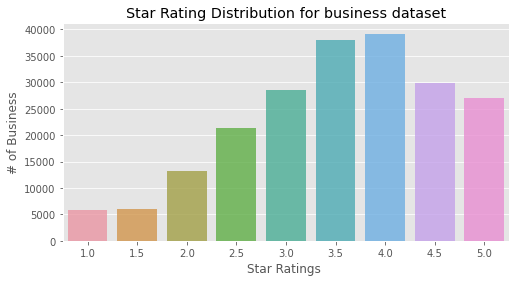

In [ ]:
x=df_business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution for business dataset")
plt.ylabel('# of Business', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'States ')

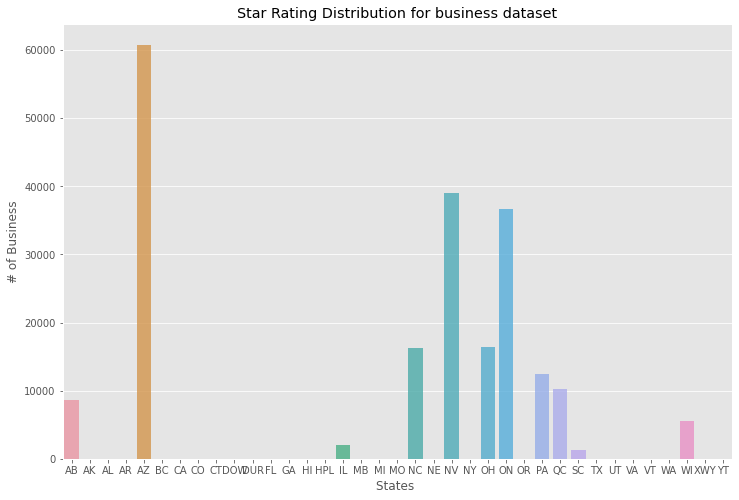

In [ ]:
x=df_business['state'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(12,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution for business dataset")
plt.ylabel('# of Business', fontsize=12)
plt.xlabel('States ', fontsize=12)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Count of Open/Close businesses ')

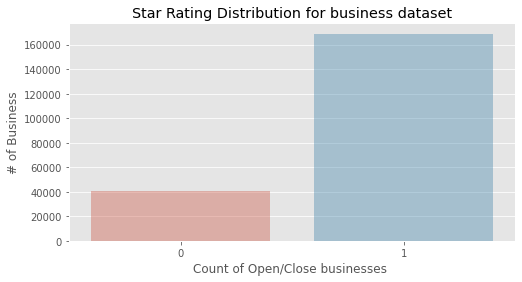

In [ ]:
x=df_business['is_open'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.4)
plt.title("Star Rating Distribution for business dataset")
plt.ylabel('# of Business', fontsize=12)
plt.xlabel('Count of Open/Close businesses ', fontsize=12)

It can be seen that 25% businesses are closed permanently.

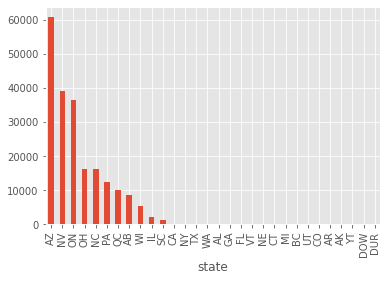

In [ ]:
df_bus_groups1 = df_business.groupby('state').count()
df_bus_state = df_bus_groups1['name']
df_bus_state_sorted = df_bus_state.sort_values(ascending = False)
df_bus_state_sorted[:30].plot(kind = 'bar')

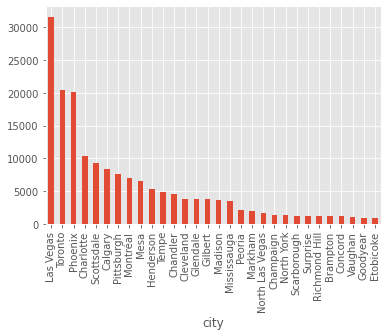

In [ ]:
df_bus_groups = df_business.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

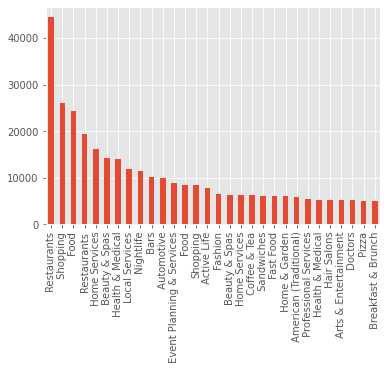

In [ ]:
uniq_cat_dict = {}
for i in df_business.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

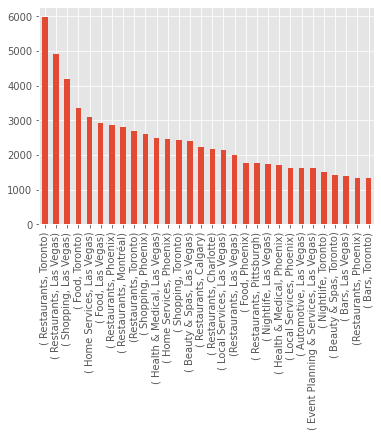

In [ ]:
business_city = {}
n = len(df_business)
for i in range(n):
    k1 = str(df_business.categories.iloc[i]).split(',')
    k2 = df_business.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

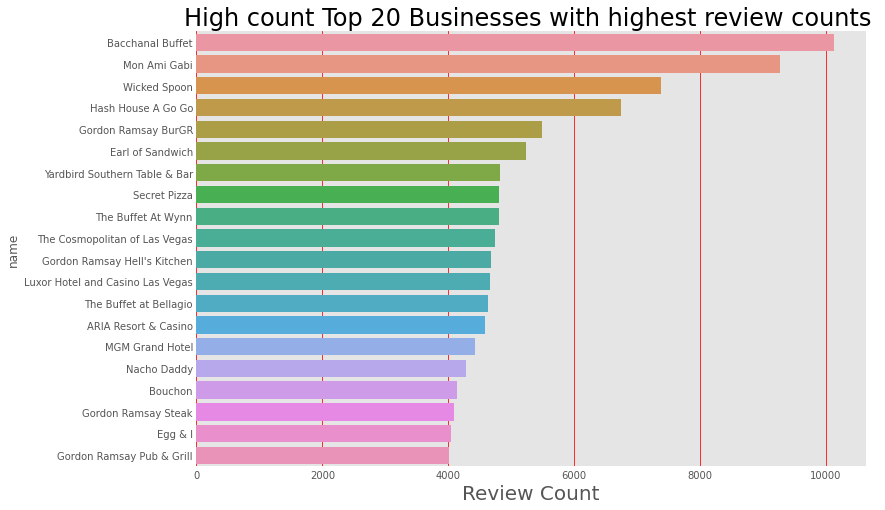

In [ ]:
#get top 20 most reviewed business
n_top =20
most_reviewed_business = df_business.nlargest(n_top, 'review_count').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_business)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("High count Top 20 Businesses with highest review counts ",fontsize=24);
ax.grid(axis = 'x', color ='red', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

It can be seen that most of the businesses listed on the Yelp are Restaurants, Shopping places and Recreational Centers. For this given data set (obtained from Yelp's Website), top cities with maximum businesses are Las Vegas, Phoenix, and Toronto.If seen statewise Arizona has most business reviewed.We can also see that around 40000 business are permanently closed(which needs to be cleaned from review dataset as there is no point in recmmending closed businesses.For getting clear results and to focus results , we will also focusing on restaurants/food business for now.

##Analysis of user dataset

In [ ]:
df_user_mod.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,average_stars,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,3.57,0


In [ ]:
df_user_mod.isnull().sum()

user_id              0
name                 0
review_count         0
yelping_since        0
useful               0
funny                0
cool                 0
elite                0
average_stars        0
compliment_photos    0
dtype: int64

In [ ]:
df_user_mod.nunique()

user_id              1968703
name                  144820
review_count            1877
yelping_since        1960575
useful                  5112
funny                   3730
cool                    4314
elite                    760
average_stars            400
compliment_photos        971
dtype: int64

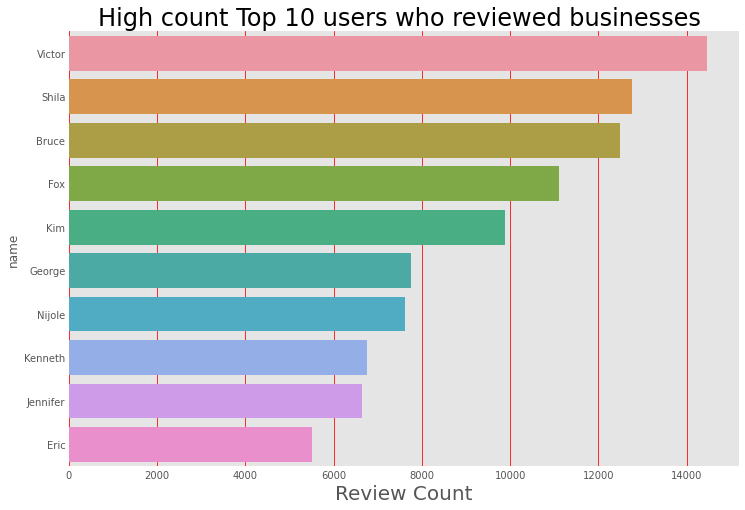

In [ ]:
#get top 10 most reviewing users
n_top =10
most_review_user = df_user_mod.nlargest(n_top, 'review_count').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_review_user)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("High count Top 10 users who reviewed businesses ",fontsize=24);
ax.grid(axis = 'x', color ='red', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

It can be seen that 'Victor' have given large number of reviews.And only 4 users have given reviews >10000.

##Merging dataset

In [ ]:
##merging user_mod, business and reduced_review dataframes for further processing
df_merged1 = df_review_mod.merge(df_business[['name','city','state','categories','is_open','review_count','business_id']], how = 'outer', on= 'business_id')
df_merged1.head()

,review_id,user_id,business_id,stars,name,city,state,categories,is_open,review_count
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180
1,t7xOZF5UKXjSpVcXLOSAgw,owbC7FP8SNAlwv6f9S5Stw,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180
2,MimB5Xh85rG7phUMPrShag,v9vGnjphb0Hta0lvtf5haA,-MhfebM0QIsKt87iDN-FNw,3.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180
3,sLkT7J06L4TK4PiRUFax2g,AXuHgGQoNPkiSXTxHlQc0A,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180
4,cnV5xtm6WuyaLfot9uWbDg,LkWNo83Lg92C5V4JEyxOZA,-MhfebM0QIsKt87iDN-FNw,3.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180


In [ ]:
df_merged1.rename(columns = {'review_count':'review_count_indi_bus'}, inplace = True)

In [ ]:
df_merged1.rename(columns = {'name':'business_name'}, inplace = True)

In [ ]:
df_merged1.head(1)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180


In [ ]:
df_three_dataset_merged = df_merged1.merge(df_user_mod[['name','review_count','user_id']], how = 'outer', on= 'user_id')

In [ ]:
df_three_dataset_merged.head(1)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,name,review_count
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180,Jamie,58


In [ ]:
df_three_dataset_merged.rename(columns = {'name':'user_name'}, inplace = True)

In [ ]:
df_three_dataset_merged.rename(columns = {'review_count':'review_count_indi_user'}, inplace = True)

In [ ]:
df_three_dataset_merged.head(1)

,review_id,user_id,business_id,stars,business_name,city,state,categories,is_open,review_count_indi_bus,user_name,review_count_indi_user
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,Bellagio Gallery of Fine Art,Las Vegas,NV,"Shopping, Arts & Entertainment, Art Galleries,...",1,180,Jamie,58


In [ ]:
# storing pandas dataframe as a picklefile for later use ...(Merged dataset for three files review, user, business)
if not os.path.isfile("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl"):
    df_three_dataset_merged.to_pickle("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl")
else:
    df_three_dataset_merged = pd.read_pickle("drive/My Drive/CMPE-256-Project/YelpMergedData.pkl")

This merged dataframe was then futher processed for extracting only open restaurants in Montreal city .

#Analysis of review dataset

In [ ]:
df_review_mod.head(1)

,review_id,user_id,business_id,stars
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0


In [ ]:
no_of_ratings_per_business = df_review_mod.groupby(by = "business_id")["stars"].count().sort_values(ascending = False)

In [ ]:
no_of_ratings_per_business.head(20)

business_id
RESDUcs7fIiihp38-d6_6g    10417
4JNXUYY8wbaaDmk3BPzlWw     9536
K7lWdNUhCbcnEvI0NhGewg     7594
f4x1YBxkLrZg652xt2KR5g     6859
cYwJA2A6I12KNkm2rtXd5g     5586
DkYS3arLOhA8si5uUEmHOw     5370
faPVqws-x-5k2CQKDNtHxw     4979
5LNZ67Yw9RD6nf4_UhXOjw     4973
2weQS-RnoOBhb1KsHKyoSQ     4953
iCQpiavjjPzJ5_3gPD5Ebg     4882
AV6weBrZFFBfRGCbcRGO4g     4819
vHz2RLtfUMVRPFmd7VBEHA     4801
SMPbvZLSMMb7KU76YNYMGg     4749
ujHiaprwCQ5ewziu0Vi9rw     4731
El4FC8jcawUVgw_0EIcbaQ     4589
QXV3L_QFGj8r6nWX2kS2hA     4357
rcaPajgKOJC2vo_l3xa42A     4305
JDZ6_yycNQFTpUZzLIKHUg     4225
OETh78qcgDltvHULowwhJg     4217
3kdSl5mo9dWC4clrQjEDGg     4125
Name: stars, dtype: int64

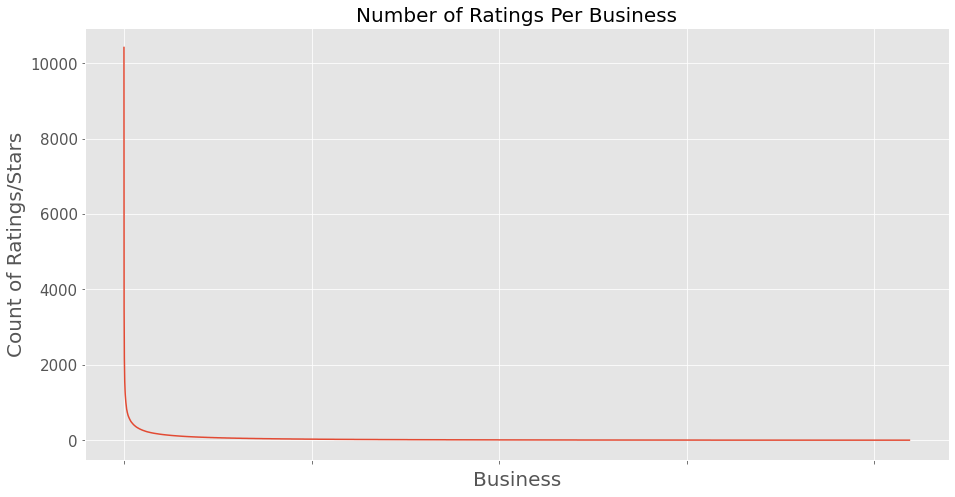

In [ ]:
fig = plt.figure(figsize = (12, 6))
axes = fig.add_axes([0.1,0.1,1,1])
plt.title("Number of Ratings Per Business", fontsize = 20)
plt.xlabel("Business", fontsize = 20)
plt.ylabel("Count of Ratings/Stars", fontsize = 20)
plt.plot(no_of_ratings_per_business.values)
plt.tick_params(labelsize = 15)
axes.set_xticklabels([])
plt.show()

As we can see graph is pretty skewed, this shows that very less number of business are popular (have large number of reviews)

In [ ]:
def changingLabels(number):
    return str(number/10**6) + "M"

In [ ]:
#It clearly shows that there are some movies which are very popular and were rated by many users as comapared to other movies

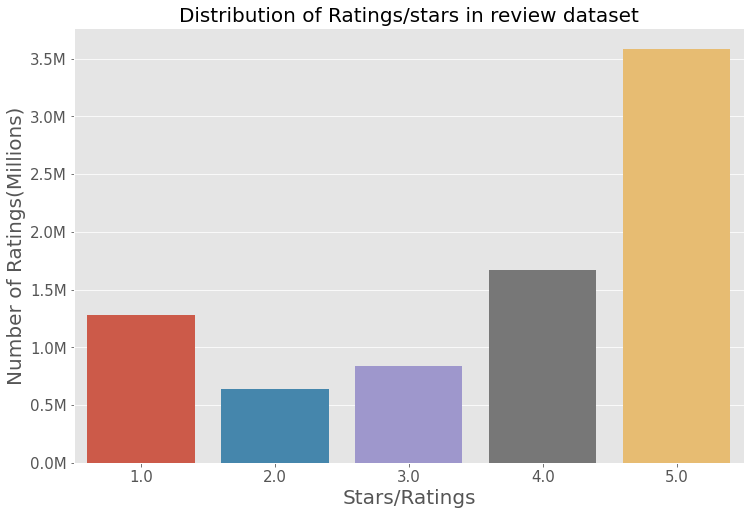

In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="stars", data= df_review_mod)

ax.set_yticklabels([changingLabels(num) for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings/stars in review dataset", fontsize = 20)
plt.xlabel("Stars/Ratings", fontsize = 20)
plt.ylabel("Number of Ratings(Millions)", fontsize = 20)
plt.show()

Large number of ratings in review dataset have rating as '5'

##creating restauarant_df from business_df

In [ ]:
df_business['categories'] = df_business['categories'].astype(str)
restaurant_df = df_business[df_business['categories'].str.contains('Food')==True]

In [ ]:
restaurant_df.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."


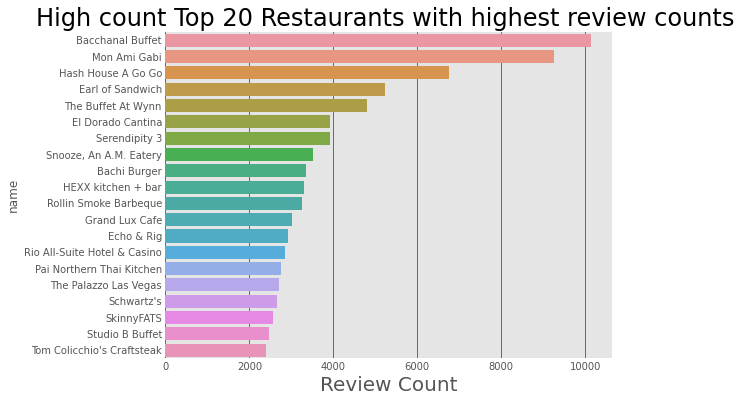

In [ ]:
#get top 10 most reviewed business
n_top =20
most_reviewed_rest = restaurant_df.nlargest(n_top, 'review_count').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_rest)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(8, 6)
plt.title("High count Top 20 Restaurants with highest review counts ",fontsize=24);
ax.grid(axis = 'x', color ='red', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Additinal analysis to see top 20 restaurants which have high number of review count obtained from business dataset.It ca be seen that there are only 5 restaurants which have review count >4000.

----------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------